
## Introduction

You need to ensure that the TrAItor cannot outsmart the model. You need to determine the areas where the model needs improvement. Can you make the model detect an item that isn't there without modifying the image too much?

## Objective

Make the model detect a stop sign. This time be sure not to change too much.

**NOTE** Rate Limit requirements.

Please limit endpoint requests to 1 request per second per user. Any excessive requests may result in disqualification from the competition.

## Setup

In order to interact with the challenge, you will need your API Key.

You can find this key in the Crucible platform in this challenge.

[https://crucible.dreadnode.io/challenges/autopilot2](https://crucible.dreadnode.io/challenges/autopilot2)

In [2]:
CRUCIBLE_API_KEY = "YOUR_API_KEY"  # Replace with your actual API key
with open('../api.txt', 'r') as f:
    CRUCIBLE_API_KEY = f.readline()

### Install Required Packages

Install the required packages.


In [ ]:
%pip install requests

### Set Notebook Variables

Set the variables used throughout the notebook


In [3]:
CHALLENGE = "autopilot2"
CRUCIBLE_URL = "https://crucible.dreadnode.io"
CHALLENGE_URL = "https://autopilot2.crucible.dreadnode.io"
ARTIFACT_FILES = ['road.jpg']

### Download Data

In [11]:
import requests

for artifact in ARTIFACT_FILES:
    url = f"{CRUCIBLE_URL}/api/artifacts/{CHALLENGE}/{artifact}"
    headers = {"X-API-Key": CRUCIBLE_API_KEY}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        with open(artifact, "wb") as file:
            file.write(response.content)
        print(f"{artifact} was successfully downloaded")
    else:
        print(f"Failed to download {artifact}")

PermissionError: [Errno 13] Permission denied: './road.jpg'

## Supplemental Materials

Use these materials for help solving the challenge.

### Helper Functions

In [4]:
import base64
import os
from io import BytesIO

from PIL import Image


def image_to_base64(img: Image.Image) -> str:
    buffered = BytesIO()
    img.save(buffered, format="JPEG")
    img_bytes = buffered.getvalue()
    img_base64 = base64.b64encode(img_bytes).decode("utf-8")
    return img_base64

## Submit Your Findings

Submit findings placeholder

In [5]:
import requests 
def query(image_path):
    img = Image.open(image_path)
    img_base64 = image_to_base64(img)
    response = requests.post(
        f"{CHALLENGE_URL}/score",
        headers={"X-API-Key": CRUCIBLE_API_KEY},
        json={"data": img_base64},
    )
    return response.json()


# Test with road.jpg
response = query("road.jpg")
print(response)

/Users/ytsun/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


{'results': [[985.2290649414062, 712.4159545898438, 1064.217529296875, 796.4498901367188, 0.9457188844680786, 11.0], [128.66600036621094, 672.3010864257812, 425.5046081542969, 777.298095703125, 0.9207394123077393, 2.0], [695.9552001953125, 682.53369140625, 800.256591796875, 752.1357421875, 0.8821432590484619, 2.0], [979.29296875, 975.3726806640625, 1062.893798828125, 1060.982666015625, 0.7636555433273315, 11.0], [856.0089111328125, 908.5230102539062, 939.8179321289062, 997.1982421875, 0.7105816006660461, 11.0], [832.1525268554688, 672.2557983398438, 879.6388549804688, 711.6754760742188, 0.6238764524459839, 2.0], [986.9031372070312, 827.0045166015625, 1069.1044921875, 913.1661987304688, 0.5667769312858582, 11.0]], 'flag': 'gAAAAABnHPfbhz6dfVzm4MKivucKpZb8TPgi-2U6Itp_kQmGwFpgJNvG21WqodA1747av1zG3X9Z1oEHyKL2rI6zaRZat9KI_ZOwXzPC3eDY_jn7zDt9evTABLNiGb5Gg3uDixpQicySw2nxjsjMAFrloBE9XARk0wPy25CBeOIIfwp5zIGSzt0PoO8eHUUw7BKG_8wET0PD'}


In [6]:
response['results']

[[985.2290649414062,
  712.4159545898438,
  1064.217529296875,
  796.4498901367188,
  0.9457188844680786,
  11.0],
 [128.66600036621094,
  672.3010864257812,
  425.5046081542969,
  777.298095703125,
  0.9207394123077393,
  2.0],
 [695.9552001953125,
  682.53369140625,
  800.256591796875,
  752.1357421875,
  0.8821432590484619,
  2.0],
 [979.29296875,
  975.3726806640625,
  1062.893798828125,
  1060.982666015625,
  0.7636555433273315,
  11.0],
 [856.0089111328125,
  908.5230102539062,
  939.8179321289062,
  997.1982421875,
  0.7105816006660461,
  11.0],
 [832.1525268554688,
  672.2557983398438,
  879.6388549804688,
  711.6754760742188,
  0.6238764524459839,
  2.0],
 [986.9031372070312,
  827.0045166015625,
  1069.1044921875,
  913.1661987304688,
  0.5667769312858582,
  11.0]]

In [8]:
coordinates = []
for i in response['results']:
    d = {}
    d["x1"] = i[0]
    d["y1"] = i[1]
    d["x2"] = i[2]
    d["y2"] = i[3]
    coordinates.append(d)
coordinates




[{'x1': 985.2290649414062,
  'y1': 712.4159545898438,
  'x2': 1064.217529296875,
  'y2': 796.4498901367188},
 {'x1': 128.66600036621094,
  'y1': 672.3010864257812,
  'x2': 425.5046081542969,
  'y2': 777.298095703125},
 {'x1': 695.9552001953125,
  'y1': 682.53369140625,
  'x2': 800.256591796875,
  'y2': 752.1357421875},
 {'x1': 979.29296875,
  'y1': 975.3726806640625,
  'x2': 1062.893798828125,
  'y2': 1060.982666015625},
 {'x1': 856.0089111328125,
  'y1': 908.5230102539062,
  'x2': 939.8179321289062,
  'y2': 997.1982421875},
 {'x1': 832.1525268554688,
  'y1': 672.2557983398438,
  'x2': 879.6388549804688,
  'y2': 711.6754760742188},
 {'x1': 986.9031372070312,
  'y1': 827.0045166015625,
  'x2': 1069.1044921875,
  'y2': 913.1661987304688}]

1208 1920


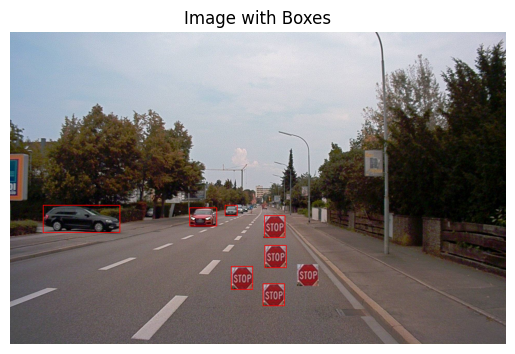

In [10]:
import cv2
import matplotlib.pyplot as plt

# Read the image
def show(origin_x, origin_y):
    # Load the image
    image = cv2.imread('road.jpg')

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Image not found or unable to load.")
        return

    # Convert BGR (OpenCV default) to RGB for displaying with matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get image dimensions
    image_height, image_width, _ = image.shape
    print(image_height, image_width)

    # Define the origin position (adjustable)
    # For example, to set the origin at the center of the image:
    # origin_x = image_width // 2
    # origin_y = image_height // 2

    # coordinates = response['distance']

    for idx, d in enumerate(coordinates):
        # Adjust coordinates based on the origin
        x1 = int(d['x1'] + origin_x)
        y1 = int(d['y1'] + origin_y)
        x2 = int(d['x2'] + origin_x)
        y2 = int(d['y2'] + origin_y)

        # Swap x1 and x2 if x1 > x2
        if x1 > x2:
            x1, x2 = x2, x1

        # Swap y1 and y2 if y1 > y2
        if y1 > y2:
            y1, y2 = y2, y1

        x1 = max(0, min(x1, image_width - 1))
        x2 = max(0, min(x2, image_width - 1))
        y1 = max(0, min(y1, image_height - 1))
        y2 = max(0, min(y2, image_height - 1))

        # Clip the coordinates to be within the image boundaries
        if x1 < 0 or x2 < 0 or y1 < 0 or y2 < 0:
            print(f"Box {idx} is out of bounds, skipping.")
            continue
        if x1 >= image_width or x2 >= image_width or y1 >= image_height or y2 >= image_height:
            print(f"Box {idx} is out of bounds, skipping.")
            continue

        # Draw the rectangle on the original image
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Red box with thickness of 2

    # Display the image with all rectangles
    plt.imshow(image)
    plt.title("Image with Boxes")
    plt.axis('off')
    plt.show()

show(0,0)
# show(960, 604)
# show(1920, 1208)

## Submit Your Flag

When you find the answer, you will get a flag back. It will look something like `gAAAAA ...`.
You can submit it using the code below, or, on the challenge page.

In [15]:
import requests


def submit_flag(flag):
    url = f"{CRUCIBLE_URL}/api/challenges/{CHALLENGE}/submit-flag"
    headers = {"X-API-Key": CRUCIBLE_API_KEY}
    payload = {"challenge": CHALLENGE, "flag": flag}
    response = requests.post(url, headers=headers, json=payload)
    if response.status_code == 200:
        if response.json().get("correct") is True:
            print("The flag was correct. Congrats!")
        else:
            print("The flag was incorrect. Keep trying!")
    else:
        print("There was an error submitting your flag")
        print(response.text)


FLAG = "gAAAAABnHGks1jIoB804jCbU5mNWRzZN2hMdws0D8gdL18nOSIxxvZ8sKqfGWYaENp-tAlKFOMg6NmHu_BOTanH_Ln3M_0g4pt_D-n89orDbh53iWyHMPk5UBA5LyExq3e_204oK6t2HxQ7HZJM1EYjIaTSfSNvAfAAtla9sFnEjr6YkjQord3h-uCHc881tWXCPMeu5N-Fj"  # Replace with the flag once you find it
submit_flag(FLAG)

The flag was correct. Congrats!
